In [17]:
gamma = 2.0
delta = 0.95
psi = 0.5
R = 1.0/delta
income = 1.0

In [ ]:
def u(c,gamma):
    util = -np.inf*np.ones(np.ma.size(c,0))
    if gamma==1.0:
        util[c>0] = np.log(c[c>0])
    else :
        util[c>0] = c[c>0]**(1.0-gamma)/(1.0-gamma)
    return util

In [ ]:
def temp(c,gamma,psi):
    return psi*u(c,gamma)

# Set up space for solution

## Grid for wealth

In [48]:
nw = 100
wmin = 0.0
wmax = 20.0
gw = np.linspace(wmin,wmax,nw)

## Grid for shock

In [49]:
nshock = 10
proc = qe.tauchen(0.95,0.03,3,nshock)
pshock = proc.P
shock = proc._state_values
pshock

array([[7.21444004e-01, 2.75313342e-01, 3.24205876e-03, 5.95223165e-07,
        1.35247369e-12, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.47706773e-02, 6.81353307e-01, 2.41540825e-01, 2.33484509e-03,
        3.45327530e-07, 6.28275210e-13, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.60769038e-04, 9.07754211e-02, 6.97293989e-01, 2.10005749e-01,
        1.66387401e-03, 1.98151384e-07, 2.88546964e-13, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.92352106e-08, 3.85913989e-04, 1.09403413e-01, 7.08111115e-01,
        1.80926176e-01, 1.17325032e-03, 1.12453215e-07, 1.31117339e-13,
        0.00000000e+00, 0.00000000e+00],
       [2.61545193e-14, 3.50369813e-08, 5.65054859e-04, 1.30600748e-01,
        7.13577372e-01, 1.54438163e-01, 8.18563769e-04, 6.31175473e-08,
        5.88418203e-14, 0.00000000e+00],
       [6.22031730e-22, 5.88833073e-14, 6.31175472e-08, 8.18563769e-04,
   

# Solution

In [50]:
V = np.zeros((nw,nshock))
Vprime = np.zeros((nw,nshock))
copt = np.zeros((nw,nshock))
cprime = np.zeros((nw,nshock))
y = np.mean(income)
iter = 0
criterion = 10.0
while (criterion>1e-8) & (iter<100):
    for e in range(nshock):
        cash = gw + y*np.exp(shock[e])
        vs = temp(cash,gamma,psi)
        for i in range(nw):
            cons = cash[i] - gw/R
            now = u(cons,gamma)
            ev = np.zeros(nw)
            for ee in range(nshock):
                    ev += pshock[e,ee]*V[:,ee]
            vp = now + delta*ev 
            j = np.argmax(vp)
            Vprime[i,e] = vp[j] - vs[i]
            cprime[i,e] = cons[j] 
    criterion = np.max(np.abs(cprime-copt))
    V[:,:] = np.copy(Vprime)
    copt[:,:] = np.copy(cprime)
    iter +=1  

In [51]:
iter

15

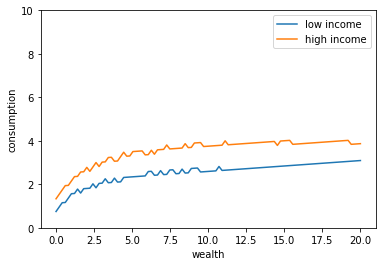

In [53]:
plt.figure()
plt.plot(gw,copt[:,0],label='low income')
plt.plot(gw,copt[:,nshock-1],label='high income')
plt.xlabel('wealth')
plt.ylim([0,10.0])
plt.ylabel('consumption')
plt.legend()
plt.show()

In [54]:
def solve(gamma,psi):
    V = np.zeros((nw,nshock))
    Vprime = np.zeros((nw,nshock))
    copt = np.zeros((nw,nshock))
    cprime = np.zeros((nw,nshock))
    y = np.mean(income)
    iter = 0
    criterion = 10.0
    while criterion>1e-8:
        for e in range(nshock):
            cash = gw + y*np.exp(shock[e])
            vs = temp(cash,gamma,psi)
            for i in range(nw):
                cons = cash[i] - gw/R
                now = u(cons,gamma)
                ev = np.zeros(nw)
                for ee in range(nshock):
                        ev += pshock[e,ee]*V[:,ee]
                vp = now + delta*ev 
                j = np.argmax(vp)
                Vprime[i,e] = vp[j] - vs[i]
                cprime[i,e] = cons[j] 
        criterion = np.max(np.abs(cprime-copt))
        V[:,:] = Vprime[:,:]
        copt[:,:] = cprime[:,:]
        iter +=1 
    return copt

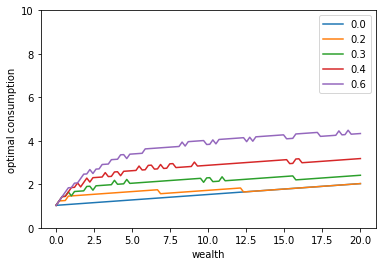

In [56]:
psis = np.linspace(0.0,0.6,5)
plt.figure()
for psi in psis: 
    copt = solve(gamma,psi)
    plt.plot(gw,copt[:,5],label=str(np.round(psi,1)))
plt.xlabel('wealth')
plt.ylabel('optimal consumption')
plt.ylim([0,10.0])
plt.legend()
plt.show()